# Project 1: Covid 19's Effect on the world economy & how Historical events can help better prepare for future unforeseen events
Team Members:  	Maxwell Miorada, Jay Cao, Chapman Mong and Luke Macumber

## Project Description/Outline:
To see what effect Covid 19 has had on the world economy in relation to financial markets, Industry Sectors, Country GDP’s (imports/exports), Commodities, health sector data.


In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


Bad key savefig.frameon in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file C:\Users\ljmac\anaconda3\envs\pyvizenv\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probab

In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Set the file paths
audusd_data = Path("Data/audusd.csv")
cadusd_data = Path("Data/cadusd.csv")
chfusd_data = Path("Data/chfusd.csv")
eurusd_data = Path("Data/eurusd.csv")
gbpusd_data = Path("Data/gbpusd.csv")
usdcny_data = Path("Data/usdcny.csv")
usdjpy_data = Path("Data/usdjpy.csv")
sp500_data = Path("Data/sp500.csv")
vix_data = Path("Data/vix_history.csv")
xlb_data = Path("Data/xlb.csv")
xle_data = Path("Data/xle.csv")
xlf_data = Path("Data/xlf.csv")
xli_data = Path("Data/xli.csv")
xlp_data = Path("Data/xlp.csv")
xlu_data = Path("Data/xlu.csv")
xlv_data = Path("Data/xlv.csv")
xly_data = Path("Data/xly.csv")
covid_data = Path("Data/covid19_global_table_data.csv")

# Read the CSVs and set the `Date` column as a datetime index to the DataFrame
# Currency
audusd_df = pd.read_csv(audusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
cadusd_df = pd.read_csv(cadusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
chfusd_df = pd.read_csv(chfusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
eurusd_df = pd.read_csv(eurusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
gbpusd_df = pd.read_csv(gbpusd_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdcny_df = pd.read_csv(usdcny_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
usdjpy_df = pd.read_csv(usdjpy_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# S&P500 & Volatility Index
sp500_df = pd.read_csv(sp500_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_df = pd.read_csv(vix_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
vix_close_df = vix_df.drop(columns=['Open','High','Low'])
# Sectors : Energy. XLE, Materials.XLB, Industrials.XLI, Utilities. XLU, Healthcare.XLV, 
#           Financials.XLF, Consumer Discretionary.XLY, Consumer Staples.XLP
xlb_df = pd.read_csv(xlb_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xle_df = pd.read_csv(xle_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlf_df = pd.read_csv(xlf_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xli_df = pd.read_csv(xli_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlp_df = pd.read_csv(xlp_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlu_df = pd.read_csv(xlu_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xlv_df = pd.read_csv(xlv_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
xly_df = pd.read_csv(xly_data, index_col="Date", infer_datetime_format=True, parse_dates=True)
# Covid 19 global data
covid_df = pd.read_csv(covid_data, index_col= 0, infer_datetime_format=True, parse_dates=True)

# Display a few rows
#covid_df.head()

## Create pivot tables for Currency, Sectors, S&P 500 and VIX index

In [4]:
# Create a new pivot table where the columns are the closing prices for each pair
fx_combined_df = pd.concat([audusd_df, eurusd_df, gbpusd_df], axis="columns", join="inner")#, cadusd_df, chfusd_df, sp500_df, usdcny_df, usdjpy_df
# Create a new pivot table where the columns are the closing prices for each sector
sector_combined_df = pd.concat([xlb_df, xle_df, xlf_df, xli_df, xlp_df, xlu_df, xlv_df, xly_df], axis="columns", join="inner")

# Sort datetime index in ascending order (past to present)
fx_combined_df.sort_index(inplace=False)
sector_combined_df.sort_index(inplace=False)

# Set column names
fx_combined_df.columns = ['AUDUSD', 'EURUSD', 'GBPUSD']# 'CADUSD', 'CHFUSD', 'USDCNY', 'USDJPY']#, 'SP500']
sector_combined_df.columns = ['Materials', 'Energy', 'Financials', 'Industrials', 'Cons Staples', 'Utilities', 'Healthcare', 'Cons Disc']

# Display a few rows
#fx_combined_df.head(10)
#sector_combined_df.head(10)

## S&P500 and the VIX are often seen as a benchmark for global economy health and volatility.
a plot of the VIX index overlayed on the S&P500

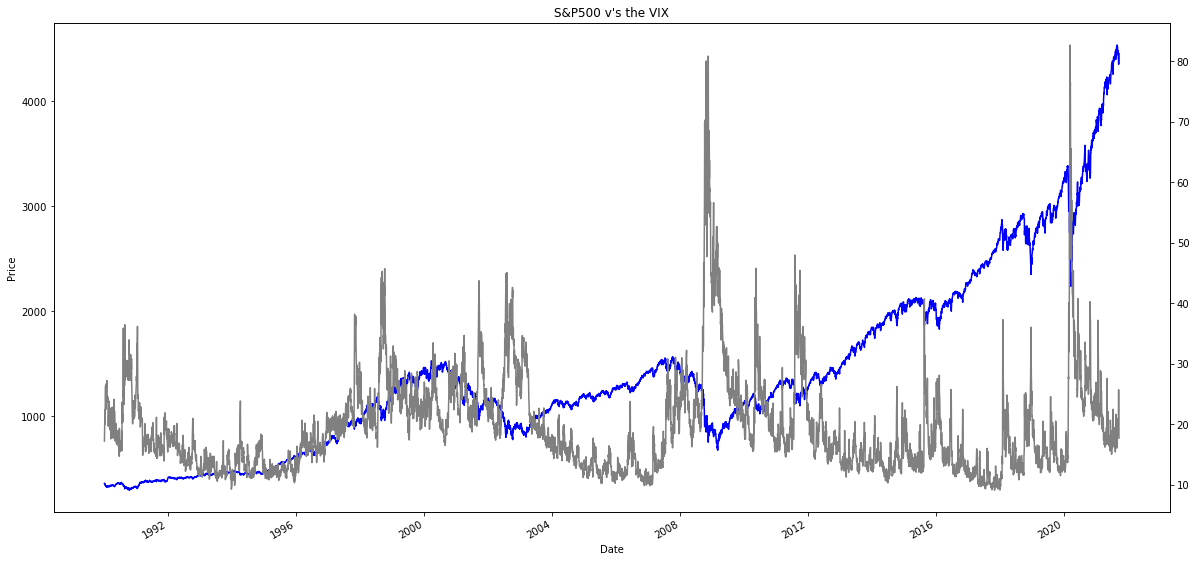

In [5]:
# Create a new pivot table where the columns are the closing prices for the sp500 and the VIX index (Fear index)
sp_vix_combined_df = pd.concat([sp500_df, vix_close_df], axis="columns", join="inner")
sp_vix_combined_df.columns = ['SP500', 'VIX']

sp_vix_combined_df.head()
#sp_vix_plot = sp_vix_combined_df.plot(xlabel="Date", ylabel="Price", title="SP500 V's VIX", secondary_y=True)
#sp500_df.plot() * vix_close_df.plot(secondary_y=True, style='g')
plt.figure()
sp_vix_combined_df.SP500.plot(style='b')
sp_vix_combined_plot = sp_vix_combined_df.VIX.plot(secondary_y=True, style='grey', figsize=(20, 10), xlabel="Date", ylabel="Price", title="S&P500 v's the VIX")


## Combined Currency Plot of AUD, EUR and GBP against the USD

[]

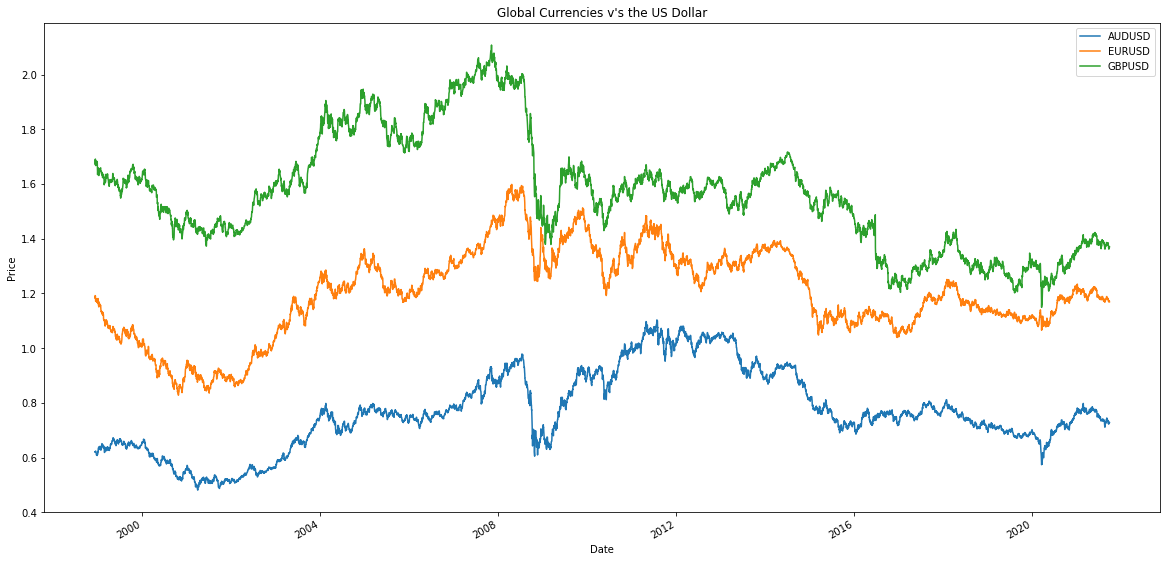

In [6]:
#fx_combined_df.plot()
fx_plot = fx_combined_df.plot(figsize=(20, 10), xlabel="Date", ylabel="Price", title="Global Currencies v's the US Dollar")#subplots=True, 
fx_plot.plot()
## US Dollar strengthens during times of Crisis!

## Combined Market Sector Plot from 2019 to 2021
This plot shows sector speed of recovery

[]

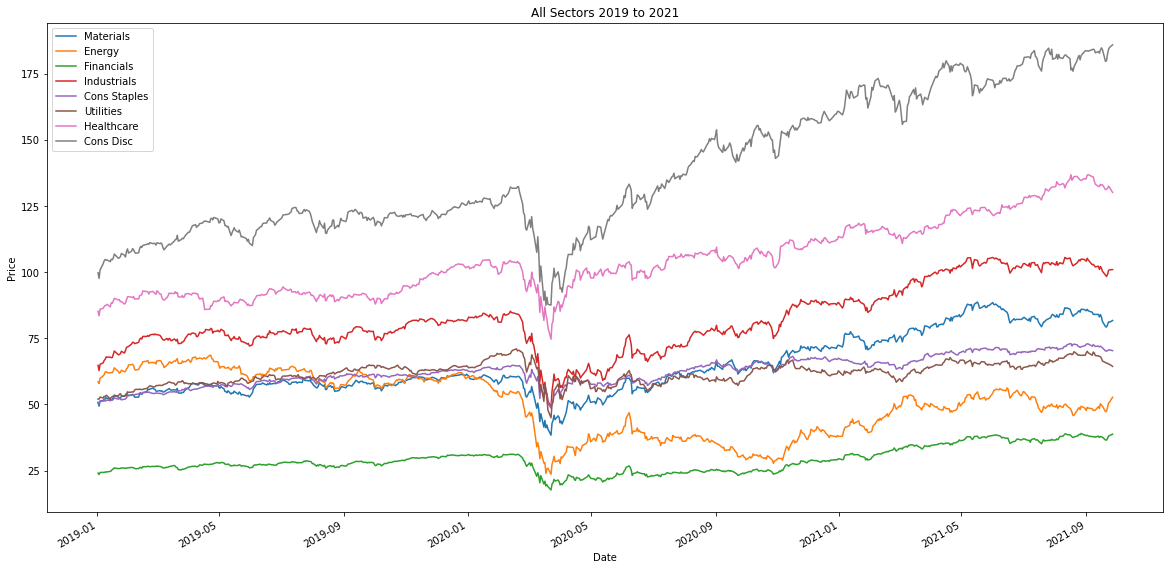

In [7]:
#sector_combined_df.plot()
sector_plot = sector_combined_df.plot(figsize=(20, 10), xlabel="Date", ylabel="Price", title="All Sectors 2019 to 2021")
sector_plot.plot()


In [8]:
# Use the `pct_change` and Standard Deviation to calculate daily changes in currency prices
fx_daily_change = fx_combined_df.pct_change()
fx_daily_change_std = fx_daily_change.std
fx_daily_change_std

<bound method NDFrame._add_numeric_operations.<locals>.std of               AUDUSD    EURUSD    GBPUSD
Date                                    
1998-12-10       NaN       NaN       NaN
1998-12-11  0.000161  0.007352  0.008966
1998-12-14 -0.002738 -0.000671  0.001718
1998-12-15  0.006946 -0.007136 -0.004554
1998-12-16  0.000481 -0.009639 -0.009446
...              ...       ...       ...
2021-09-23  0.008841  0.004363  0.007538
2021-09-24 -0.004879 -0.001661 -0.003411
2021-09-25  0.000000  0.000000  0.000000
2021-09-26  0.000716  0.000290 -0.000358
2021-09-27  0.001830 -0.002350  0.002469

[6903 rows x 3 columns]>

In [9]:
# Use the `pct_change` and standard deviation to calculate daily changes in sectors
sector_daily_change = sector_combined_df.pct_change()
sector_daily_change_std = sector_daily_change.std
sector_daily_change_sum = sector_daily_change.cumsum()
sector_daily_change_sum.head()

Materials    Energy  Financials  Industrials  Cons Staples  \
Date                                                                     
2019-01-02        NaN       NaN         NaN          NaN           NaN   
2019-01-03  -0.028358 -0.009918   -0.022481    -0.030429     -0.005745   
2019-01-04   0.010961  0.024106    0.010738     0.007487      0.015574   
2019-01-07   0.014472  0.038972    0.011975     0.015622      0.014209   
2019-01-08   0.024965  0.046707    0.012798     0.029325      0.023390   

            Utilities  Healthcare  Cons Disc  
Date                                          
2019-01-02        NaN         NaN        NaN  
2019-01-03  -0.000192   -0.020305  -0.021652  
2019-01-04   0.014615    0.009526   0.011442  
2019-01-07   0.007793    0.013365   0.034055  
2019-01-08   0.020196    0.021129   0.045111

In [30]:
# Use hvplot() function to plot data (LABEL CHART)
#fx_daily_change_plot = fx_daily_change.hvplot(figsize=(20, 10), xlabel="Date", ylabel="Change", title="Currency Daily Changes")
#fx_daily_change_plot
# You can clearly visualise huge spikes within each currency

fx_daily_change_plot_1 = px.line(
    fx_daily_change, title="Currency Daily Changes"
)
fx_daily_change_plot_1

In [31]:
# Use hvplot() function to plot data
#sector_daily_change.hvplot() 
#sector_daily_change_sum_plot = sector_daily_change_sum.hvplot(figsize=(80, 40), xlabel="Date", ylabel="Change", title="Sector Daily Changes Sum Plot")
#sector_daily_change_sum_plot
# 
sector_daily_change_sum_plot_1 = px.line(
    sector_daily_change_sum, title="Sector Daily Changes Sum Plot"
)
sector_daily_change_sum_plot_1

- - -

## Heatmap Correlations for FX and Sectors

- - -

In [12]:
# Correlation for currency pairs
#  Use the `corr` function to calculate the correlation between changes in currency
fx_correlation = fx_daily_change.corr()
fx_correlation

AUDUSD    EURUSD    GBPUSD
AUDUSD  1.000000  0.530327  0.505773
EURUSD  0.530327  1.000000  0.601509
GBPUSD  0.505773  0.601509  1.000000

In [13]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
#fx_correlation_heatmap = sns.heatmap(fx_correlation, vmin=-1, vmax=1)
#(SEE IF THERE IS ANY DIFFERING CORRELATIONS DURING CRISIS BY SLICING DATA)
fx_correlation_heatmap = px.imshow(fx_correlation, title='AUDUSD, EURUSD & GBPUSD Correlations',)
fx_correlation_heatmap

In [14]:
# Correlation for sectors
#  Use the `corr` function to calculate the correlation between changes in sectors
sector_correlation = sector_daily_change.corr()
sector_correlation

Materials    Energy  Financials  Industrials  Cons Staples  \
Materials      1.000000  0.765326    0.879120     0.914204      0.733370   
Energy         0.765326  1.000000    0.821325     0.792518      0.519605   
Financials     0.879120  0.821325    1.000000     0.918709      0.710973   
Industrials    0.914204  0.792518    0.918709     1.000000      0.744417   
Cons Staples   0.733370  0.519605    0.710973     0.744417      1.000000   
Utilities      0.670682  0.466541    0.657450     0.682903      0.820983   
Healthcare     0.757344  0.574634    0.727895     0.766894      0.805412   
Cons Disc      0.819506  0.649349    0.795488     0.838918      0.718841   

              Utilities  Healthcare  Cons Disc  
Materials      0.670682    0.757344   0.819506  
Energy         0.466541    0.574634   0.649349  
Financials     0.657450    0.727895   0.795488  
Industrials    0.682903    0.766894   0.838918  
Cons Staples   0.820983    0.805412   0.718841  
Utilities      1.000000    0.734674   0.633845  
Healthcare     0.734674    1.000000   0.762186  
Cons Disc      0.633845    0.762186   1.000000

In [15]:
# Use the `heatmap` function from the Seaborn library to visualize the correlation table
#sector_correlation_heatmap = sns.heatmap(sector_correlation, vmin=-1, vmax=1)
#(SEE IF THERE IS ANY DIFFERING CORRELATIONS DURING CRISIS BY SLICING DATA)
sector_correlation_heatmap = px.imshow(sector_correlation, title='Sector Correlations',)
sector_correlation_heatmap

- - -

## Seaborn Pairs Plot:
Visualisation of a matrix of scatterplots to see the relationships between the currency pairs.

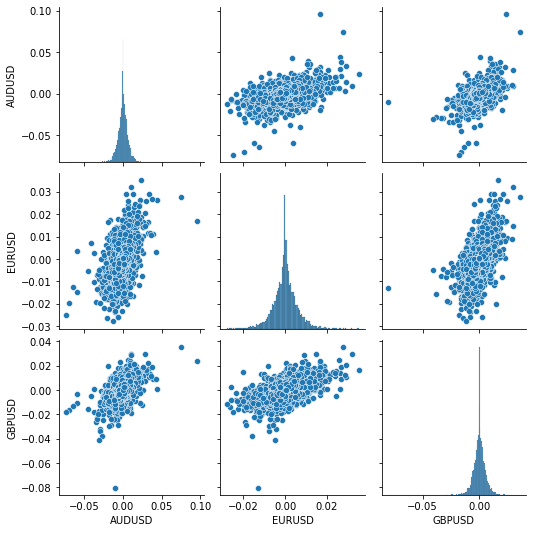

In [16]:
# Create the default pairplot
fx_pair_plot = sns.pairplot(fx_daily_change)

#fx_daily_change = px.data.iris()
#fx_pair_plot = px.scatter_matrix(fx_daily_change)
#fx_pair_plot.show()

In [17]:
# Slice DataFrame into recent crisis points
# Slice DataFrame into approximate start of covid19
daily_change_covid = fx_daily_change.loc['2019-12-1':'2021-09-29']
daily_change_covid

# Slice DataFrame into GFC timeframe
daily_change_gfc = fx_daily_change.loc['2007-06-1':'2009-06-1']
daily_change_gfc

# Slice DataFrame into Dot Com timeframe
daily_change_dotcom = fx_daily_change.loc['2000-1-1':'2002-12-30']
daily_change_dotcom

# Slice DataFrame into 10 year timeframe
#daily_return_10_year = fx_daily_changes.loc['2009-04-29':'2019-04-29']
#daily_return_10_year

AUDUSD    EURUSD    GBPUSD
Date                                    
2000-01-03  0.005658  0.018904  0.012632
2000-01-04 -0.004410  0.004101  0.001040
2000-01-05  0.004124  0.003987  0.002749
2000-01-06 -0.005932 -0.000484  0.003289
2000-01-07  0.002295 -0.002229 -0.005100
...              ...       ...       ...
2002-12-24  0.003562  0.004389  0.000439
2002-12-25 -0.000355  0.002039  0.000753
2002-12-26  0.000355  0.004555  0.003134
2002-12-27 -0.004437  0.007332  0.002187
2002-12-30  0.008556  0.002681 -0.000374

[774 rows x 3 columns]

In [18]:
# Display hvplot of Covid19 daily changes (WANT TO SCALE THIS TO ONLY PLOT DATA NOT SPACES)
#fx_historic_crashes = daily_change_covid.hvplot() * daily_change_gfc.hvplot() * daily_change_dotcom.hvplot()
#fx_historic_crashes

In [19]:
# Display currency daily change during historic crisis
fx_change_covid = daily_change_covid.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)
fx_change_gfc = daily_change_gfc.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)
fx_change_dotcom = daily_change_dotcom.hvplot.line(x='Date', 
                value_label='% of Change', legend='top', height=400, width=700)#, xlim=(2000-1-1, 2002-12-30)
fx_historic_crashes = fx_change_covid * fx_change_gfc * fx_change_dotcom
fx_historic_crashes

:Overlay
   .NdOverlay.I   :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)
   .NdOverlay.II  :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)
   .NdOverlay.III :NdOverlay   [Variable]
      :Curve   [Date]   (% of Change)

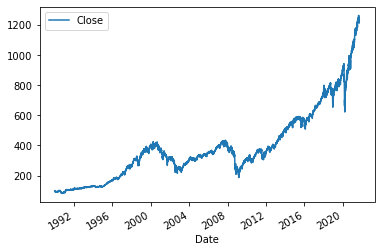

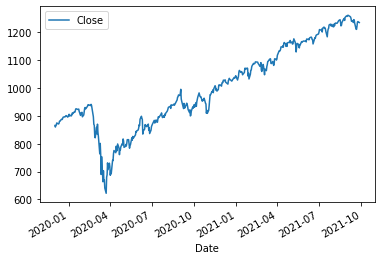

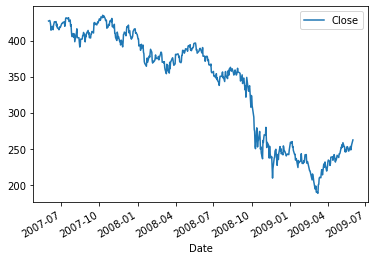

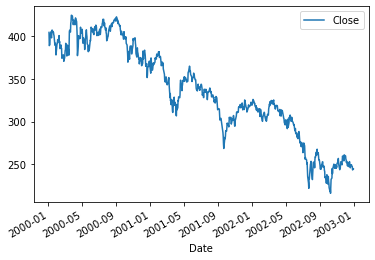

In [20]:
# S&P500 percent change
sp500_change = sp500_df.pct_change()
sp500_change_std = sp500_change.std
initial_start = 100
sp500_cumulative = (1 + sp500_change).cumprod()
(initial_start * sp500_cumulative).plot.line(label="S&P 500 from 1990 to 2021")

# Slice sp500 DataFrame into recent crisis points
# Slice DataFrame into approximate start of covid19
sp500_covid = sp500_cumulative.loc['2019-12-1':'2021-09-29']
sp500_covid_plot = (initial_start * sp500_covid).plot(label="S&P 500 Covid19")

# Slice sp500 DataFrame into GFC timeframe
sp500_gfc = sp500_cumulative.loc['2007-06-1':'2009-06-1']
sp500_gfc_plot =  (initial_start * sp500_gfc).plot(label="S&P 500 GFC")

# Slice sp500 DataFrame into Dot Com timeframe
sp500_dotcom = sp500_cumulative.loc['2000-1-1':'2002-12-30']
sp500_dotcom_plot = (initial_start * sp500_dotcom).plot.line(label="S&P 500 DotCom")

#sp500_dotcom_plot = px.line(
#    sp500_dotcom, title="S&P 500 DotCom"
#)
#sp500_covid_plot, sp500_gfc_plot, sp500_dotcom_plot

In [34]:
# Display sp500 hvplot of Covid19 percentage changes (RESCALE TO SHOW ONLY DATA AREA AND BEGIN CHART AT 100%)
plot_sp500_covid = sp500_covid.hvplot(label="S&P500 v Covid19", height=400, width=1000, rot=90).opts(yformatter="%.0f")
plot_sp500_gfc = sp500_gfc.hvplot(label="S&P500 v GFC", rot=90).opts(yformatter="%.0f")
plot_sp500_dotcom = sp500_dotcom.hvplot(label="S&P500 v Dot-Com", rot=90).opts(yformatter="%.0f")
plot_sp500_historic_plot = plot_sp500_covid * plot_sp500_gfc * plot_sp500_dotcom
plot_sp500_historic_plot
# COMPARE HOW QUICKLY EACH HISTORICAL CRASH DROPPED & THEN RECOVERED

:Overlay
   .Curve.S_ampersand_P500_v_Covid19              :Curve   [Date]   (Close)
   .Curve.S_ampersand_P500_v_GFC                  :Curve   [Date]   (Close)
   .Curve.S_ampersand_P500_v_Dot_hyphen_minus_Com :Curve   [Date]   (Close)

- - - 

## Volatility Index aka "The Fear Index"
When the VIX rises above 20 we can expect to see markets becomming volatile.
When the VIX is spiking up greater than 30 there is larger volatility resulting from increased uncertainty and risk.  

In [32]:
#vix_close_df.plot(xlabel="Date", ylabel="Price", title="VIX Index 1990 to 2021")
#vix_change_plot = vix_close_df.hvplot.line(x='Date', 
#                value_label='% of Change', legend='top', title="Volatility Index", height=400, width=700)
#vix_change_plot
vix_change_plot = px.line(
    vix_close_df, title="Volatility Index"
)
vix_change_plot

<AxesSubplot:title={'center':'VIX Index v DotCom'}, xlabel='Date', ylabel='Price'>

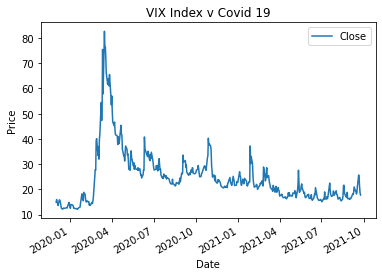

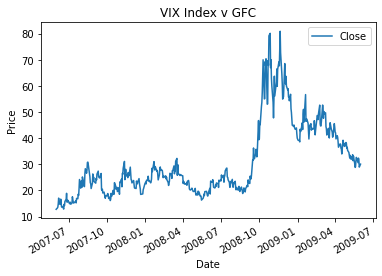

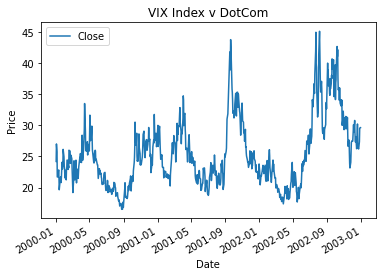

In [23]:
vix_covid = vix_close_df.loc['2019-12-1':'2021-09-29']
vix_gfc = vix_close_df.loc['2007-06-1':'2009-06-1']
vix_dotcom = vix_close_df.loc['2000-1-1':'2002-12-30']
#vix_covid.plot(xlabel="Date", ylabel="Price", title="VIX Index v Covid 19"), 
#vix_gfc.plot(xlabel="Date", ylabel="Price", title="VIX Index v GFC"), 
#vix_dotcom.plot(xlabel="Date", ylabel="Price", title="VIX Index v DotCom") 
vix_covid.plot(xlabel="Date", ylabel="Price", title="VIX Index v Covid 19"), 
vix_gfc.plot(xlabel="Date", ylabel="Price", title="VIX Index v GFC"), 
vix_dotcom.plot(xlabel="Date", ylabel="Price", title="VIX Index v DotCom") 

- - - 

## Covid 19 Effect On The World Economy Panel
**Areas of Interest:** S&P 500 v VIX Index, Currency Plots & Sector Plots. 

- - -

In [24]:
# Put covid plots in a single row
row_of_currency = pn.Row(fx_pair_plot, fx_plot, fx_daily_change_plot_1, fx_historic_crashes, fx_correlation_heatmap, fx_change_covid)
row_of_sector = pn.Row(sector_daily_change_sum_plot_1,sector_correlation_heatmap)# sector_plot, )
row_of_sp500vix = pn.Row(plot_sp500_historic_plot, vix_change_plot)

In [28]:
# Insert row_of_sp500vix into a column object with Markdown text
plots_as_column = pn.Column(
    "## Covid 19's Effect on the world economy", row_of_sp500vix
)

In [29]:
# Create tabs
tabs = pn.Tabs(
    ("S&P500", plots_as_column),
    ("Currency Plots", row_of_currency),
    ("Sector Plots", row_of_sector)
    
)
tabs

BokehModel(combine_events=True, render_bundle={'docs_json': {'704f21f0-d4f9-422c-aa3d-118445e3a7dd': {'defs': …

Tabs
    [0] Column
        [0] Markdown(str)
        [1] Row
            [0] HoloViews(Overlay)
            [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1990-01-...})
    [1] Row
        [0] Str(PairGrid)
        [1] Str(AxesSubplot)
        [2] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['1998-12-...}, visible=False)
        [3] HoloViews(Overlay)
        [4] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-0.5, ...}, visible=False)
        [5] HoloViews(NdOverlay)
    [2] Row
        [0] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': ['2019-01-...}, visible=False)
        [1] Plotly(Figure, relayout_data={'autosize': True}, viewport={'xaxis.range': [-0.5, ...}, visible=False)

- - - 

## Conclusion, Findings & Observations

Global - Currency, S&P500 and VIX
Localised - Sectors
Historical Crashes - Covid19, GFC & Dotcom.
This is why we did this...
Covid was the fastest crash and fastest recovery.

**Given more time:** We would have looked at other historical crashes. 


- - - 